In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
devices = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
input_size = 784 #images have a size of 28 by 28, flattening it will set it to 784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.01


In [4]:
train_dataset = torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor(), download=False)

train_loader= torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader= torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)





100%|██████████| 9912422/9912422 [00:36<00:00, 270350.95it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 29224534.10it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:06<00:00, 272654.55it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4807097.85it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape,labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


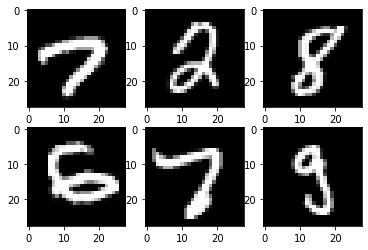

In [6]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [7]:
class NeuralNet(nn.Module):

    def __init__(self,input_size,hidden_size,num_classes) -> None:
        super(NeuralNet,self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size,num_classes)


    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
    

model = NeuralNet(input_size,hidden_size,num_classes)
criterion = nn.CrossEntropyLoss() #this loss automatically adds the softmax to it
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)



In [8]:
# train loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        images = images.reshape(-1,28*28).to(devices)
        labels = labels.to(devices)

        #forward
        output = model(images)
        loss = criterion(output, labels)

        #backword
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"epoch {epoch+1} / {num_epochs}  step {i+1} / {n_total_steps} loss {loss.item():.4f}")


# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1,28*28).to(devices)
        labels = labels.to(devices)
        output = model(images)

        # _ = (value, index)
        _, predictions = torch.max(output,1)
        n_samples = labels.shape[0]
        n_correct = (predictions == labels).sum().item()

    accuracy = 100 * n_correct/ n_samples
    print(f"accuracy = {accuracy}")


epoch 1 / 2  step 100 / 600 loss 0.2953
epoch 1 / 2  step 200 / 600 loss 0.1372
epoch 1 / 2  step 300 / 600 loss 0.1943
epoch 1 / 2  step 400 / 600 loss 0.1078
epoch 1 / 2  step 500 / 600 loss 0.1239
epoch 1 / 2  step 600 / 600 loss 0.1249
epoch 2 / 2  step 100 / 600 loss 0.1043
epoch 2 / 2  step 200 / 600 loss 0.1448
epoch 2 / 2  step 300 / 600 loss 0.2415
epoch 2 / 2  step 400 / 600 loss 0.1239
epoch 2 / 2  step 500 / 600 loss 0.0260
epoch 2 / 2  step 600 / 600 loss 0.1396
accuracy = 94.0
